
> library(readxl)

> library(tidyr)

> library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




> library(ggplot2)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



> library(scales)

> temp <- tempfile(fileext = ".zip")

> download.file("https://drive.google.com/uc?authuser=0&id=1yaXybxZAT1iPL8l_QnvrTkWxrZK_4win&export=download", 
+     temp)

> out <- unzip(temp, exdir = tempdir())

> reporte_registros <- read_excel(out[1])

> pendientes <- read_excel(out[3], sheet = "Table 9")

> pendientes$Fecha <- "2021-12-30"

> pendientes$Class <- "Registro"

> pendientespub <- pendientes

> pendientespub$Class <- "Primera publicación"

> pendientes <- rbind(pendientes, pendientespub)

> pendientes <- pendientes[, c(1, 3, 2)]

> pendientes$Fecha <- as.Date(pendientes$Fecha)

> fechas_registros <- reporte_registros

> fechas_registros$Registro <- as.Date(fechas_registros$Registro, 
+     format = "%d/%m/%y %H:%M:%S")

> fechas_registros$`Primera publicación` <- as.Date(fechas_registros$`Primera publicación`, 
+     format = "%d/%m/%y %H:%M:%S")

> attach(fechas_registros)

> fechas_registros <- fechas_registros[order(Registro), 
+     ]

> attach(reporte_re

The following objects are masked from fechas_registros:

    Cédula jurídica, Institución, Primera publicación, Registro




> reporte_registros <- reporte_registros[order(Registro), 
+     ]

> for (i in 0:13) {
+     fechas_registros[227 + i, 3] <- as.Date(as.numeric(reporte_registros[227 + 
+         i, 3]), origin = "1899-12-30")
+ }

> df <- gather(fechas_registros, key = "Class", value = "Fecha", 
+     3:4)

> df$Fecha[is.na(df$Fecha)] <- "2021-12-30"

> df <- df[, c(2, 3, 4)]

> df <- rbind(df, pendientes)

> ggplot(df, aes(x = Fecha)) + stat_ecdf(aes(color = Class, 
+     linetype = Class), geom = "step", size = 1.5) + scale_color_manual(values = c("#00A ..." ... [TRUNCATED] 


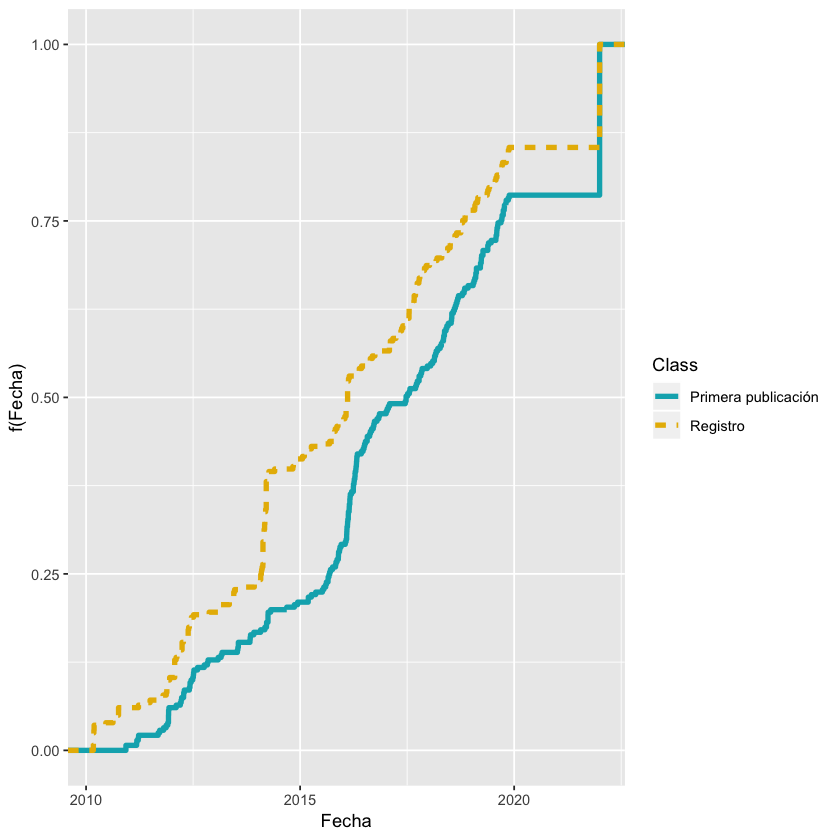

In [1]:
source("Fechas.R", echo = T)